# Sentimental Analysis on Restaurant Review

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from textblob import Word, TextBlob
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
data= pd.read_csv("Restaurant_Reviews.tsv" ,delimiter="\t")
data.shape

(1000, 2)

In [3]:
data.head(6)

Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1
5     Now I am getting angry and I want my damn pho.      0

In [4]:
data.tail(6)

Review  Liked
994           I can't tell you how disappointed I was.      0
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

In [5]:
data['Liked'].unique()

array([1, 0])

<Axes: >

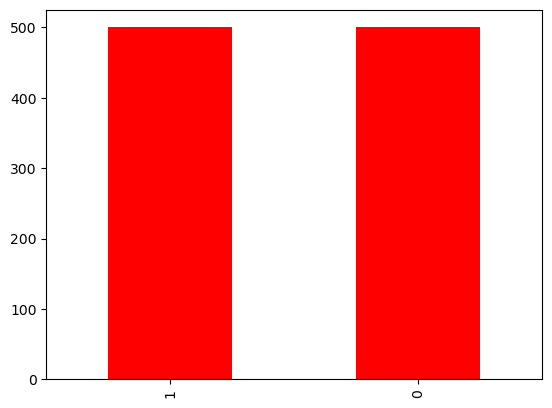

In [6]:
data['Liked'].value_counts().plot.bar(color = 'red')

In [7]:
data['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [8]:
data.duplicated().sum()

4

In [9]:
data=data.drop_duplicates()

In [10]:
data.shape

(996, 2)

In [11]:
data['Liked'].value_counts()

1    499
0    497
Name: Liked, dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  996 non-null    object
 1   Liked   996 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 23.3+ KB


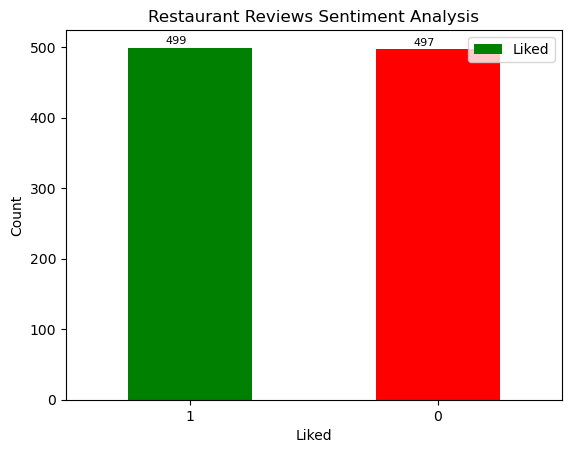

In [13]:
import matplotlib.pyplot as plt

# Getting value counts for the 'Liked' column
value_counts = data['Liked'].value_counts()
ax = value_counts.plot(kind='bar', color=['green', 'red'], rot=0)

for i, v in enumerate(value_counts):
    ax.text(i - 0.1, v + 5, str(v), color='black', fontsize=8)
ax.set_title('Restaurant Reviews Sentiment Analysis')
ax.set_xlabel('Liked')
ax.set_ylabel('Count')
ax.legend(['Liked', 'Disliked'], loc='upper right')

plt.show()


In [14]:
print(data['Review'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 996, dtype: object


In [15]:
#Removing Puntuations
import string
exclude = string.punctuation
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def remove_punc(text):
    return text.translate(str.maketrans('','',exclude))

In [17]:
data['Review']=data['Review'].apply(remove_punc)

In [18]:
#Lowercase all the reviews
data['Review']=data['Review'].str.lower()
data['Review']

0                                   wow loved this place
1                                      crust is not good
2               not tasty and the texture was just nasty
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                              appetite instantly gone
997    overall i was not impressed and would not go back
998    the whole experience was underwhelming and i t...
999    then as if i hadnt wasted enough of my life th...
Name: Review, Length: 996, dtype: object

In [19]:
#For removing stopwords
from nltk.corpus import stopwords

In [20]:
def remove_stopwords(text):
    new_text = []
    
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [21]:
data['Review']= data['Review'].apply(remove_stopwords)
data['Review']

0                                       wow loved  place
1                                           crust   good
2                                tasty   texture   nasty
3      stopped    late may bank holiday  rick steve r...
4                     selection   menu  great     prices
                             ...                        
995              think food   flavor  texture    lacking
996                              appetite instantly gone
997                 overall    impressed  would  go back
998     whole experience  underwhelming   think well ...
999        hadnt wasted enough   life   poured salt  ...
Name: Review, Length: 996, dtype: object

In [22]:
#Removing rarewords:
drops = pd.Series(' '.join(data['Review']).split()).value_counts()[-250:]
data['Review'] = data['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [23]:
data

Review  Liked
0                                      wow loved place      1
1                                           crust good      0
2                                  tasty texture nasty      0
3    stopped late may bank holiday rick steve recom...      1
4                          selection menu great prices      1
..                                                 ...    ...
995                  think food flavor texture lacking      0
996                            appetite instantly gone      0
997                    overall impressed would go back      0
998  whole experience underwhelming think well go n...      0
999  hadnt wasted enough life poured salt wound tim...      0

[996 rows x 2 columns]

In [24]:
#!pip install textblob

In [25]:
from textblob import TextBlob

textblob_list = []

for review_text in data['Review']:
    txtblb = TextBlob(str(review_text))
    textblob_list.append(txtblb)
print(textblob_list)

[TextBlob("wow loved place"), TextBlob("crust good"), TextBlob("tasty texture nasty"), TextBlob("stopped late may bank holiday rick steve recommendation loved"), TextBlob("selection menu great prices"), TextBlob("getting angry want damn pho"), TextBlob("honeslty didnt taste fresh"), TextBlob("potatoes like rubber could tell made ahead time kept warmer"), TextBlob("fries great"), TextBlob("great touch"), TextBlob("service prompt"), TextBlob("would go back"), TextBlob("cashier care ever say still ended wayyy overpriced"), TextBlob("tried cape cod ravoli chicken cranberrymmmm"), TextBlob("disgusted pretty sure human hair"), TextBlob("shocked signs indicate cash"), TextBlob("highly recommended"), TextBlob("waitress little slow service"), TextBlob("place worth time let alone vegas"), TextBlob("like"), TextBlob("burrittos blah"), TextBlob("food amazing"), TextBlob("service also cute"), TextBlob("could care less interior beautiful"), TextBlob("performed"), TextBlob("thats rightthe red velvet 

In [26]:
#tokenization
data["Review"].apply(lambda x: TextBlob(x).words).head()

0                                  [wow, loved, place]
1                                        [crust, good]
2                              [tasty, texture, nasty]
3    [stopped, late, may, bank, holiday, rick, stev...
4                     [selection, menu, great, prices]
Name: Review, dtype: object

In [27]:
data

Review  Liked
0                                      wow loved place      1
1                                           crust good      0
2                                  tasty texture nasty      0
3    stopped late may bank holiday rick steve recom...      1
4                          selection menu great prices      1
..                                                 ...    ...
995                  think food flavor texture lacking      0
996                            appetite instantly gone      0
997                    overall impressed would go back      0
998  whole experience underwhelming think well go n...      0
999  hadnt wasted enough life poured salt wound tim...      0

[996 rows x 2 columns]

In [28]:
#stemming
from nltk.stem.porter import PorterStemmer

In [29]:
ps = PorterStemmer()
data['Review'] = data['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [30]:
data["Review"].head()

0                                      wow loved place
1                                           crust good
2                                  tasty texture nasty
3    stopped late may bank holiday rick steve recom...
4                           selection menu great price
Name: Review, dtype: object

In [31]:
#lemmetization
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /home/ats/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [32]:
lemmatizer = WordNetLemmatizer()
data['Review'] = data['Review'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

In [33]:
data

Review  Liked
0                                      wow loved place      1
1                                           crust good      0
2                                  tasty texture nasty      0
3    stopped late may bank holiday rick steve recom...      1
4                           selection menu great price      1
..                                                 ...    ...
995                  think food flavor texture lacking      0
996                            appetite instantly gone      0
997                    overall impressed would go back      0
998  whole experience underwhelming think well go n...      0
999  hadnt wasted enough life poured salt wound tim...      0

[996 rows x 2 columns]

In [34]:
#some visualization of reviews
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

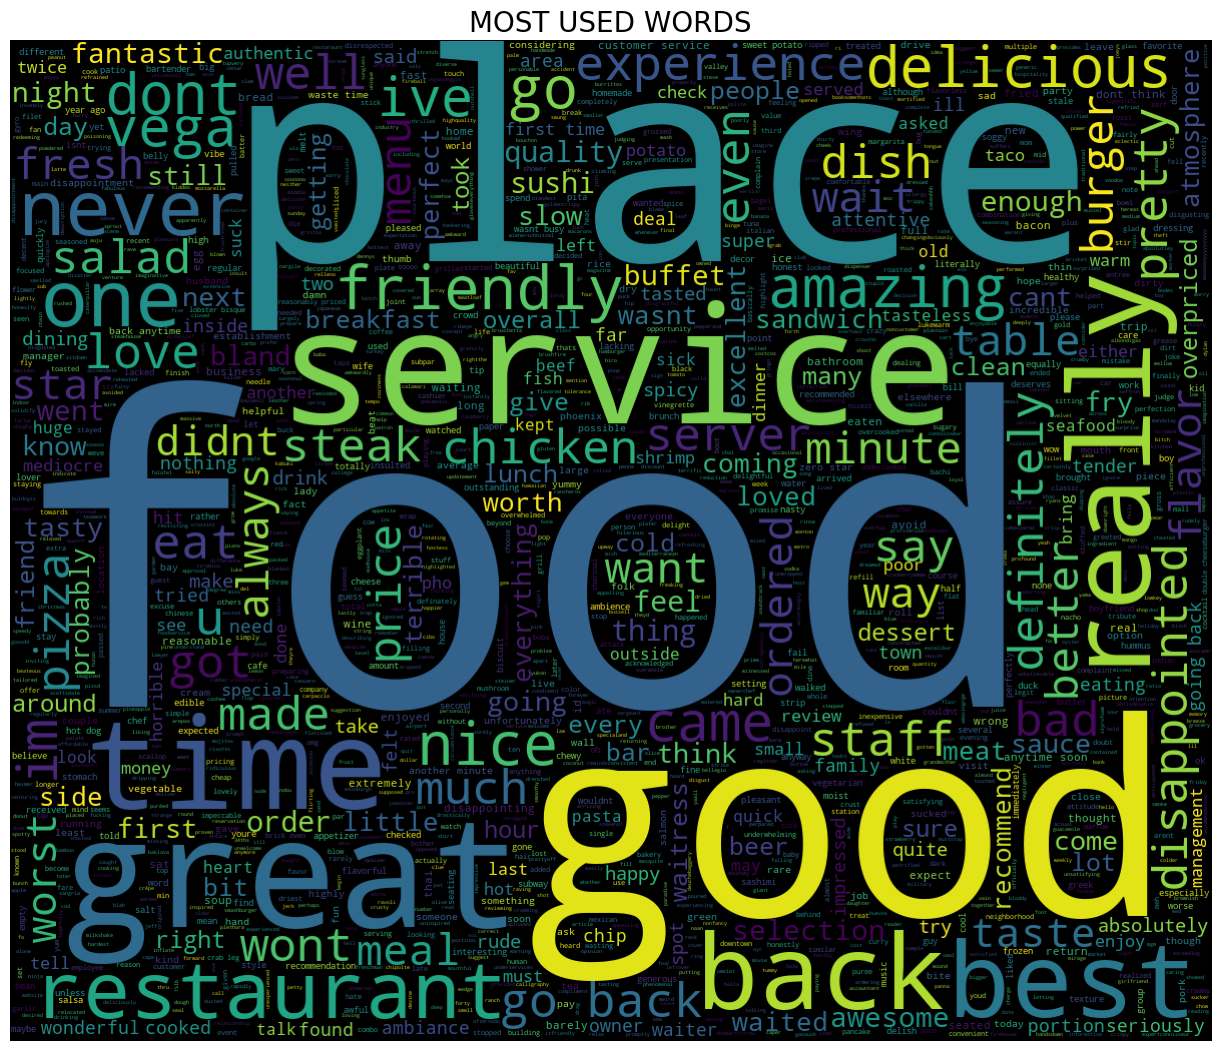

In [35]:
plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                            background_color='black',max_words=5000,
                            width=1200,stopwords=STOPWORDS,
                            height=1000
                            ).generate(" ".join(data['Review']))
plt.title("MOST USED WORDS",fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'viridis'))
plt.axis('off')
plt.show()

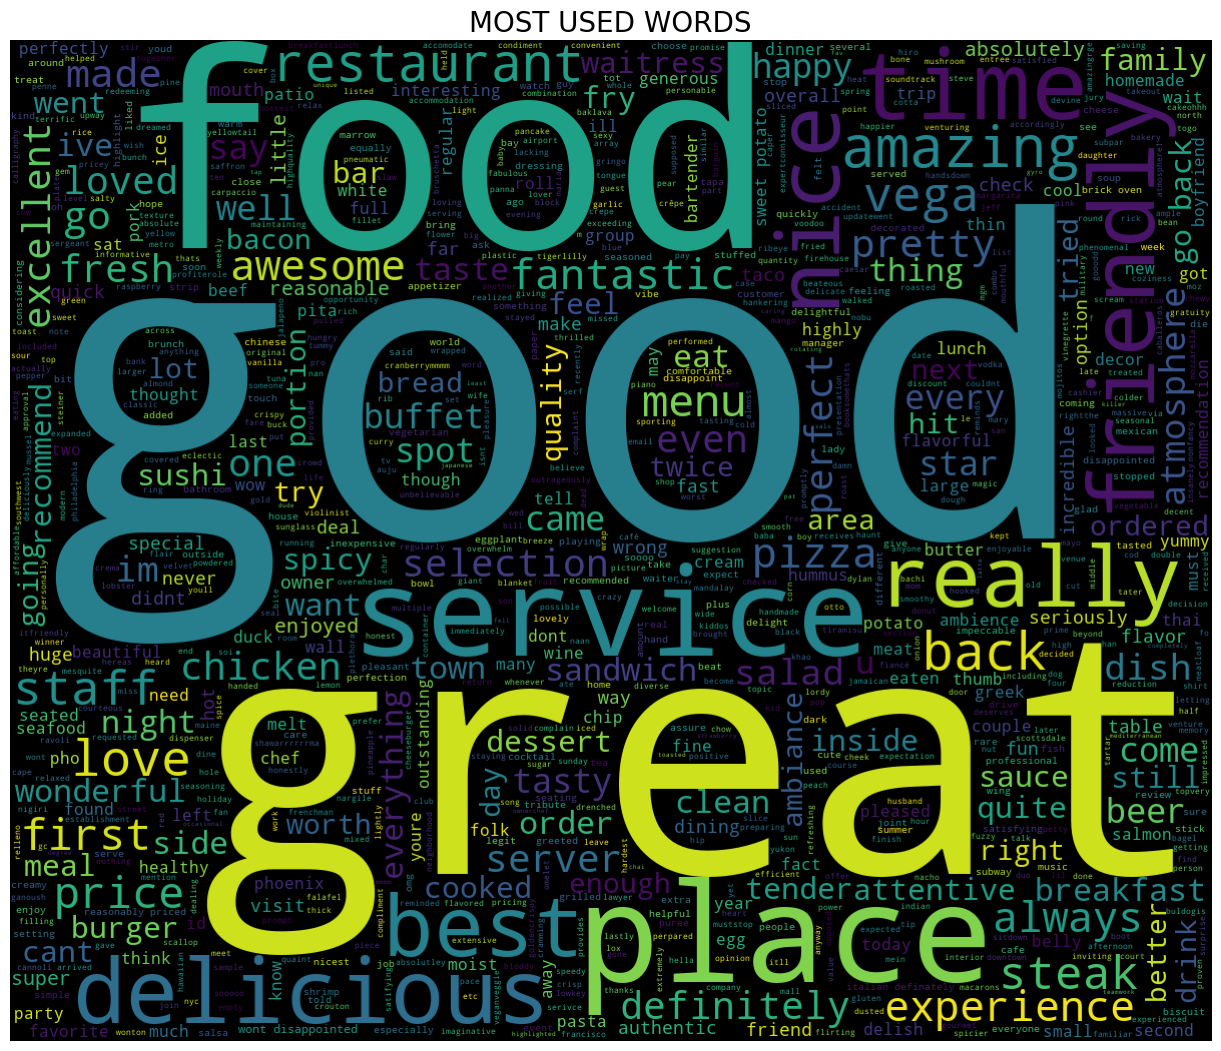

In [36]:
#Wordcloud for positive reviews

positive_reviews=data.loc[data['Liked']==1]['Review']
plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                            background_color='black',max_words=5000,
                            width=1200,stopwords=STOPWORDS,
                            height=1000
                            ).generate(" ".join(positive_reviews)) #join used for making them to a single string
plt.title("MOST USED WORDS",fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'viridis'))
plt.axis('off')
plt.show()

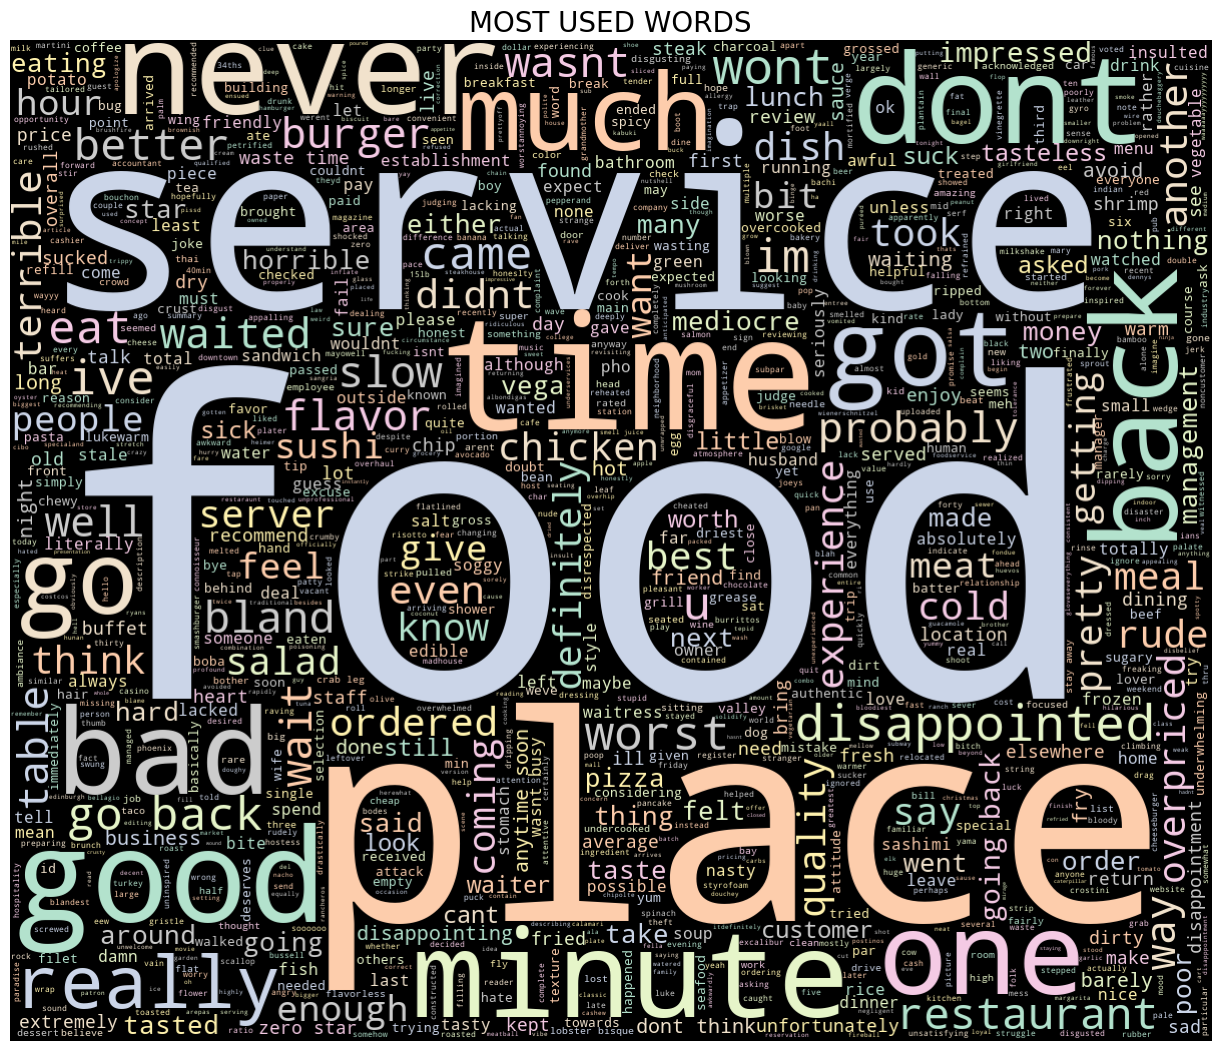

In [37]:
#Wordcloud for negative reviews

negative_reviews=data.loc[data['Liked']==0]['Review']
plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                            background_color='black',max_words=5000,
                            width=1200,stopwords=STOPWORDS,
                            height=1000
                            ).generate(" ".join(negative_reviews)) #join used for making them to a single string
plt.title("MOST USED WORDS",fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'Pastel2'))
plt.axis('off')
plt.show()

In [38]:
#Finding sentiment analysis (+ve, -ve and neutral)
pos = 0
neg = 0
neu = 0
for review in data['Review']:
    analysis = TextBlob(review)
    if analysis.sentiment[0]>0:
       pos = pos +1
    elif analysis.sentiment[0]<0:
       neg = neg + 1
    else:
       neu = neu + 1
print("Total Positive = ", pos)
print("Total Negative = ", neg)
print("Total Neutral = ", neu)

Total Positive =  516
Total Negative =  220
Total Neutral =  260


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [40]:
# creating X and y variables
X = data['Review']
y = data['Liked']

In [41]:
# instantiating CountVectorizer
vectorizer = CountVectorizer()

# fit and transform the text data
X_vectorized = vectorizer.fit_transform(X)

In [42]:
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [43]:
# instantiating and train the classifiers
clf1 = MultinomialNB()
clf1.fit(X_train, y_train)

clf2 = GaussianNB()
clf2.fit(X_train.toarray(), y_train)

clf3 = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
clf3.fit(X_train, y_train)

clf4 = RandomForestClassifier(n_estimators=100, random_state=42)
clf4.fit(X_train, y_train)

clf5 = SVC(kernel='linear')
clf5.fit(X_train, y_train)

SVC(kernel='linear')

In [44]:
# making predictions on the test data for each classifier
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test.toarray())
y_pred3 = clf3.predict(X_test)
y_pred4 = clf4.predict(X_test)
y_pred5 = clf5.predict(X_test)

In [45]:
# evaluating the accuracy of each classifier
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)
accuracy3 = accuracy_score(y_test, y_pred3)
accuracy4 = accuracy_score(y_test, y_pred4)
accuracy5 = accuracy_score(y_test, y_pred5)

print("Accuracy for Multinomial Naive Bayes:", accuracy1)
print("Accuracy for Gaussian Naive Bayes:", accuracy2)
print("Accuracy for XGBoost:", accuracy3)
print("Accuracy for Random Forest:", accuracy4)
print("Accuracy for Support Vector Machine:", accuracy5)

Accuracy for Multinomial Naive Bayes: 0.785
Accuracy for Gaussian Naive Bayes: 0.665
Accuracy for XGBoost: 0.715
Accuracy for Random Forest: 0.77
Accuracy for Support Vector Machine: 0.735


In [46]:
# printing the confusion matrix and classification report for each classifier
cm1 = confusion_matrix(y_test, y_pred1)
cr1 = classification_report(y_test, y_pred1)
print("Confusion Matrix for Multinomial Naive Bayes:\n", cm1)
print("Classification Report for Multinomial Naive Bayes:\n", cr1)

cm2 = confusion_matrix(y_test, y_pred2)
cr2 = classification_report(y_test, y_pred2)
print("Confusion Matrix for Gaussian Naive Bayes:\n", cm2)
print("Classification Report for Gaussian Naive Bayes:\n", cr2)

cm3 = confusion_matrix(y_test, y_pred3)
cr3 = classification_report(y_test, y_pred3)
print("Confusion Matrix for XGBoost:\n", cm3)
print("Classification Report for XGBoost:\n", cr3)

cm4 = confusion_matrix(y_test, y_pred4)
cr4 = classification_report(y_test, y_pred4)
print("Confusion Matrix for Random Forest:\n", cm4)
print("Classification Report for Random Forest:\n", cr4)

cm5 = confusion_matrix(y_test, y_pred5)
cr5 = classification_report(y_test, y_pred5)
print("Confusion Matrix for Support Vector Machine:\n", cm5)
print("Classification Report for Support Vector Machine:\n", cr5)

Confusion Matrix for Multinomial Naive Bayes:
 [[89 17]
 [26 68]]
Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

           0       0.77      0.84      0.81       106
           1       0.80      0.72      0.76        94

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.79      0.78       200

Confusion Matrix for Gaussian Naive Bayes:
 [[55 51]
 [16 78]]
Classification Report for Gaussian Naive Bayes:
               precision    recall  f1-score   support

           0       0.77      0.52      0.62       106
           1       0.60      0.83      0.70        94

    accuracy                           0.67       200
   macro avg       0.69      0.67      0.66       200
weighted avg       0.69      0.67      0.66       200

Confusion Matrix for XGBoost:
 [[88 18]
 [39 55]]
Classification Report for XGBoost:
               precision    rec

### Output/Conclusion
* Based on the results, it seems that Multinomial Naive Bayes and Random Forest classifiers performed the best with 0.785 and 0.77 accuracy, respectively. The other three classifiers, Gaussian Naive Bayes, XGBoost, and Support Vector Machine, had lower accuracies ranging from 0.665 to 0.735.



* Looking at the confusion matrix and classification report for Multinomial Naive Bayes, it correctly classified 89 negative reviews and 68 positive reviews. However, it incorrectly classified 26 negative reviews as positive and 17 positive reviews as negative. This resulted in a precision of 0.80 for positive reviews and 0.77 for negative reviews, and a recall of 0.72 for positive reviews and 0.84 for negative reviews.



* The Random Forest classifier also performed well, correctly classifying 88 negative reviews and 55 positive reviews. It incorrectly classified 18 negative reviews as positive and 39 positive reviews as negative. This resulted in a precision of 0.79 for positive reviews and 0.82 for negative reviews, and a recall of 0.64 for positive reviews and 0.83 for negative reviews.

* The classification report for each classifier provides metrics such as precision, recall, and F1-score for each class (Liked = 0 or 1). These metrics provide insights into how well the classifiers perform in correctly identifying the reviews for each class. Specifically, precision measures how many of the positive predictions were correct, recall measures how many of the actual positives were correctly predicted, and F1-score is the harmonic mean of precision and recall.



* For example, in the Multinomial Naive Bayes classifier, we can see from the classification report that the precision for class 0 is 0.77, which means 77% of the predicted reviews that were classified as "not liked" were actually "not liked". The recall for class 0 is 0.84, which means 84% of the actual "not liked" reviews were correctly predicted. However, the recall for class 1 is only 0.72, which means 72% of the actual "liked" reviews were correctly predicted. This suggests that the classifier might be misclassifying some of the reviews that are actually positive (class 1) as negative (class 0). Overall, the classification report provides insights into the performance of the classifiers and helps us to identify where the misclassifications are occurring.

In [47]:
#AUC-ROC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

In [48]:
# making probability predictions on the test data for each classifier
y_prob1 = clf1.predict_proba(X_test)[:, 1]
y_prob2 = clf2.predict_proba(X_test.toarray())[:, 1]
y_prob3 = clf3.predict_proba(X_test)[:, 1]
y_prob4 = clf4.predict_proba(X_test)[:, 1]
y_prob5 = clf5.decision_function(X_test)

In [49]:
# calculating the AUC-ROC score for each classifier
auc1 = roc_auc_score(y_test, y_prob1)
auc2 = roc_auc_score(y_test, y_prob2)
auc3 = roc_auc_score(y_test, y_prob3)
auc4 = roc_auc_score(y_test, y_prob4)
auc5 = roc_auc_score(y_test, y_prob5)

print("AUC-ROC score for Multinomial Naive Bayes:", auc1)
print("AUC-ROC score for Gaussian Naive Bayes:", auc2)
print("AUC-ROC score for XGBoost:", auc3)
print("AUC-ROC score for Random Forest:", auc4)
print("AUC-ROC score for Support Vector Machine:", auc5)

AUC-ROC score for Multinomial Naive Bayes: 0.8485046166198315
AUC-ROC score for Gaussian Naive Bayes: 0.6743275792854275
AUC-ROC score for XGBoost: 0.80514853472501
AUC-ROC score for Random Forest: 0.820754716981132
AUC-ROC score for Support Vector Machine: 0.8316940987555197


In [50]:
# plotting the ROC curve for each classifier
fpr1, tpr1, _ = roc_curve(y_test, y_prob1)
fpr2, tpr2, _ = roc_curve(y_test, y_prob2)
fpr3, tpr3, _ = roc_curve(y_test, y_prob3)
fpr4, tpr4, _ = roc_curve(y_test, y_prob4)
fpr5, tpr5, _ = roc_curve(y_test, y_prob5)

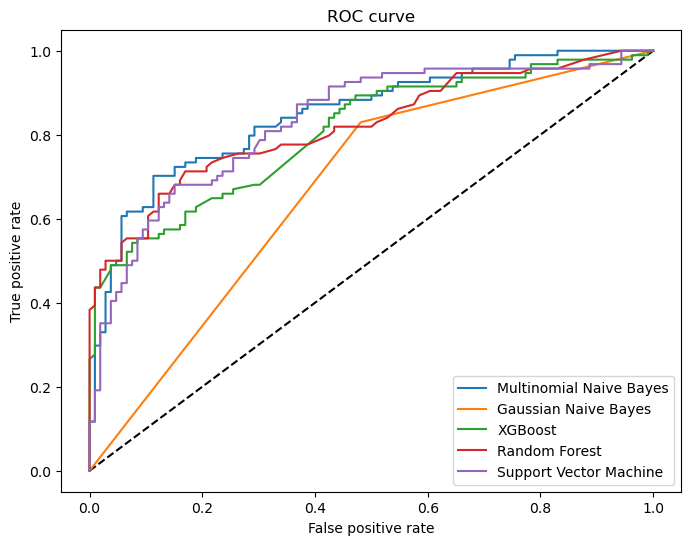

In [51]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1, label='Multinomial Naive Bayes')
plt.plot(fpr2, tpr2, label='Gaussian Naive Bayes')
plt.plot(fpr3, tpr3, label='XGBoost')
plt.plot(fpr4, tpr4, label='Random Forest')
plt.plot(fpr5, tpr5, label='Support Vector Machine')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [52]:
# defining a new review for predicting
new_review = "The food was fantastic! I loved the taste and the service was superb."

In [53]:
# vectorizing the new review using the same vectorizer used to train the classifiers
new_review_vectorized = vectorizer.transform([new_review])

In [54]:
# making predictions using each classifier
new_review_pred1 = clf1.predict(new_review_vectorized)[0]
new_review_pred2 = clf2.predict(new_review_vectorized.toarray())[0]
new_review_pred3 = clf3.predict(new_review_vectorized)[0]
new_review_pred4 = clf4.predict(new_review_vectorized)[0]
new_review_pred5 = clf5.predict(new_review_vectorized)[0]

# printing the predicted sentiment of the new review using each classifier
print("Predicted sentiment using Multinomial Naive Bayes:", new_review_pred1)
print("Predicted sentiment using Gaussian Naive Bayes:", new_review_pred2)
print("Predicted sentiment using XGBoost:", new_review_pred3)
print("Predicted sentiment using Random Forest:", new_review_pred4)
print("Predicted sentiment using Support Vector Machine:", new_review_pred5)

Predicted sentiment using Multinomial Naive Bayes: 1
Predicted sentiment using Gaussian Naive Bayes: 1
Predicted sentiment using XGBoost: 1
Predicted sentiment using Random Forest: 1
Predicted sentiment using Support Vector Machine: 1
